<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-thresholding" data-toc-modified-id="Simple-thresholding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple thresholding</a></span></li><li><span><a href="#Adaptive-thresholding" data-toc-modified-id="Adaptive-thresholding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adaptive thresholding</a></span></li><li><span><a href="#Otsu" data-toc-modified-id="Otsu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Otsu</a></span></li></ul></div>

# Thresholding
- Binarization of an image
- convert gray-scale image to binary image, where each pixel is either 0 or 255
- allows segmenting the foreground from the background of an image

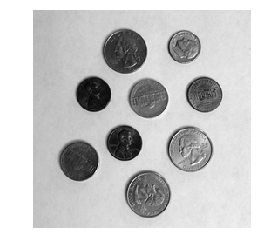

In [66]:
import cv2
import matplotlib.pyplot as plt

b, g, r = cv2.split(cv2.imread('coins.png'))
coins = cv2.cvtColor(cv2.merge([r, g, b]), cv2.COLOR_BGR2GRAY)
plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.show()

## Simple thresholding
- specify threshold T
- all pixels with intensity < T are mapped to 0
- all pixels with intensity > T are mapped to 255\n

Before thresholding apply Gaussian Blurring to remove noise in the image

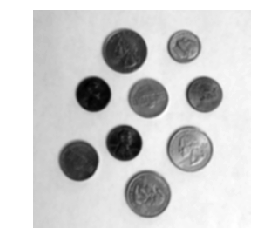

In [67]:
blurred = cv2.GaussianBlur(coins, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

Apply simple threshold to blurred image

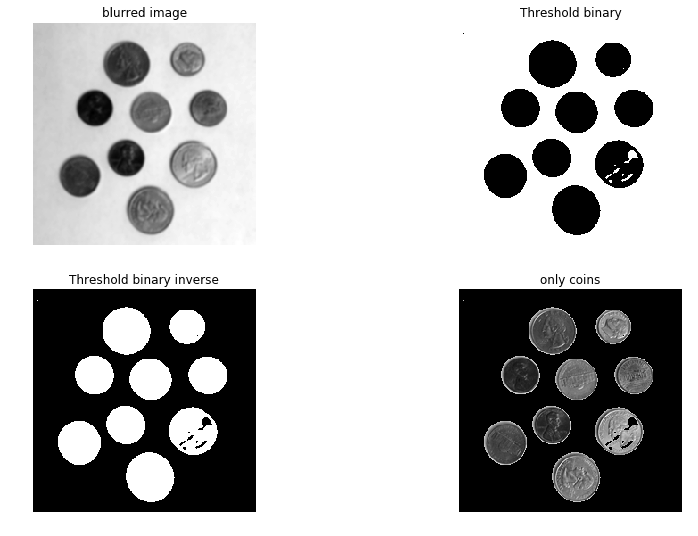

In [68]:
threshold = 155
max_value = 255
T, thresh = cv2.threshold(blurred, threshold, max_value, cv2.THRESH_BINARY)
T, threshInv = cv2.threshold(blurred, threshold, max_value, cv2.THRESH_BINARY_INV)
only_coins = cv2.bitwise_and(coins, coins, mask=threshInv)

images = [blurred, thresh, threshInv, only_coins]
descriptions = ['blurred image', 'Threshold binary', 'Threshold binary inverse', 'only coins']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)
for image, description, ax in zip(images, descriptions, axs.reshape(-1)):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(description)
plt.show()

## Adaptive thresholding
- downside of simple thresholding: threshold parameter has to be tuned manually, objects must have equal intensities
- adaptive thresholding considers small neighbors of pixels and finds optimal threshold value value for each neighbor
- two methods: adaptive mean and adaptive gaussian

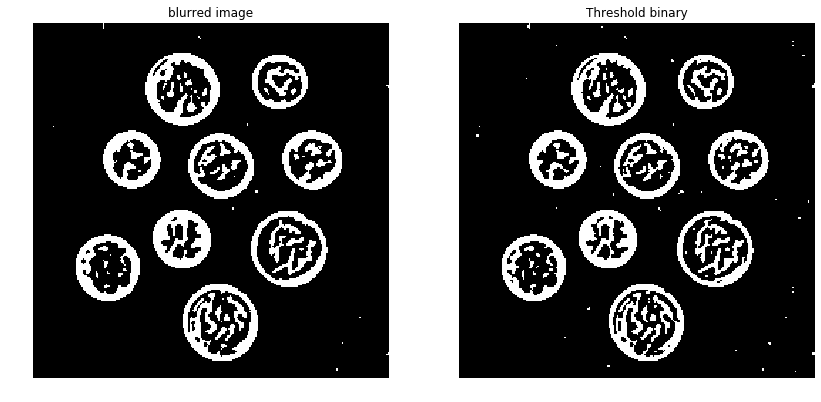

In [69]:
adaptive_methods = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
description = ['adaptive mean', 'adaptive gaussian']
parameters = [
    {'blockSize': 11, 'C': 4},
    {'blockSize': 15, 'C': 3}]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), squeeze=True)

for adaptive_method, description, parameter, ax in zip(adaptive_methods, descriptions, parameters, axs):
    image = cv2.adaptiveThreshold(
        blurred,
        max_value,
        adaptive_method,
        cv2.THRESH_BINARY_INV,
        **parameter
    )
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(description)
plt.show()


## Otsu
- assumes, there are two peaks in the grayscale histogram of the image
- tries to find an optimal value to separate these two peaks --> value of T

T = 131.0


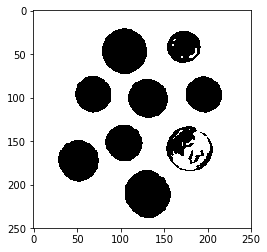

In [70]:
T, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)

print('T = {}'.format(T))
plt.imshow(thresh, cmap='gray')
plt.show()